#### Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and view the data

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed


In [5]:
# Dimension of the dataset
df.shape

(215, 14)

In [6]:
# Check the structure of data using info command
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [7]:
# Data summary for all features in the data
df.describe(include="all")

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN


In [8]:
# Check the distribution of the labelled field (Class variable)
#df.status.value_counts()
df.status.value_counts(normalize=True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

### Data Cleanup

In [9]:
# Drop sl_no field as it will not be used in the model
df=df.drop(columns=["sl_no"],axis=1)

In [10]:
# View bad data in degree_t feature
df.degree_t.head()

0     Sci&Tech
1     Sci&Tech
2    Comm&Mgmt
3     Sci&Tech
4    Comm&Mgmt
Name: degree_t, dtype: object

In [11]:
# Check the frequency distribution of the categorical levels in degree_t feature
df.degree_t.describe()

count           215
unique            3
top       Comm&Mgmt
freq            145
Name: degree_t, dtype: object

In [12]:
# Replace '&' with 'And' in degree_t 
df.degree_t=df.degree_t.str.replace("&","And")

In [13]:
# Check the frequency distribution of the categorical levels in degree_t feature and compare with orignial data
df.degree_t.value_counts()

CommAndMgmt    145
SciAndTech      59
Others          11
Name: degree_t, dtype: int64

In [14]:
# Cleanup specialisation feature in similar way

In [15]:
df.specialisation.head()

0     Mkt&HR
1    Mkt&Fin
2    Mkt&Fin
3     Mkt&HR
4    Mkt&Fin
Name: specialisation, dtype: object

In [16]:
df.specialisation=df.specialisation.str.replace("&","And")

In [17]:
df.specialisation.value_counts()

MktAndFin    120
MktAndHR      95
Name: specialisation, dtype: int64

In [18]:
# Check for duplicates
df.duplicated().sum()

0

In [19]:
# Final dimension of the dataframe
df.shape

(215, 13)

In [20]:
# Final structure of dataframe after cleanup
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


### EDA

#### Univariate Analysis

<AxesSubplot:xlabel='ssc_p'>

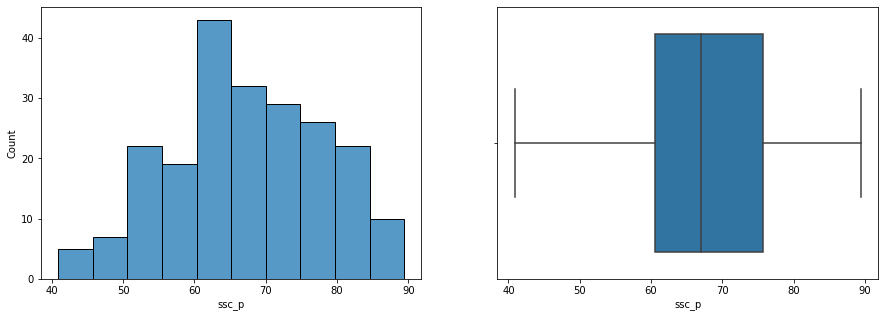

In [21]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='ssc_p', data=df, ax=axs[0])
sns.boxplot(x='ssc_p', data=df,ax=axs[1])

In [22]:
df.ssc_p.describe()

count    215.000000
mean      67.303395
std       10.827205
min       40.890000
25%       60.600000
50%       67.000000
75%       75.700000
max       89.400000
Name: ssc_p, dtype: float64

<AxesSubplot:xlabel='hsc_p'>

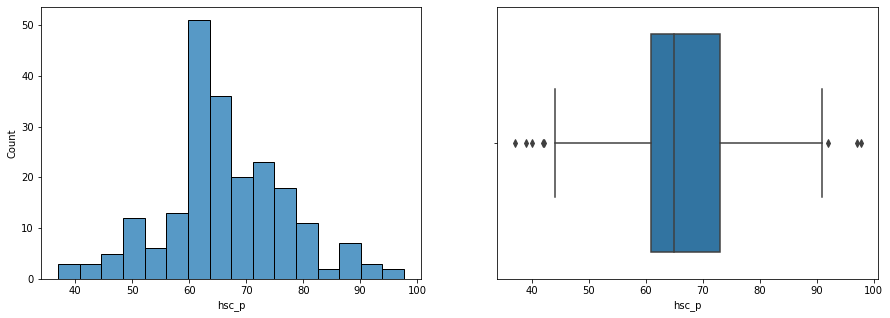

In [23]:
# Univariate analysis for hsc_p
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='hsc_p', data=df, ax=axs[0])
sns.boxplot(x='hsc_p', data=df,ax=axs[1])

<AxesSubplot:xlabel='degree_p'>

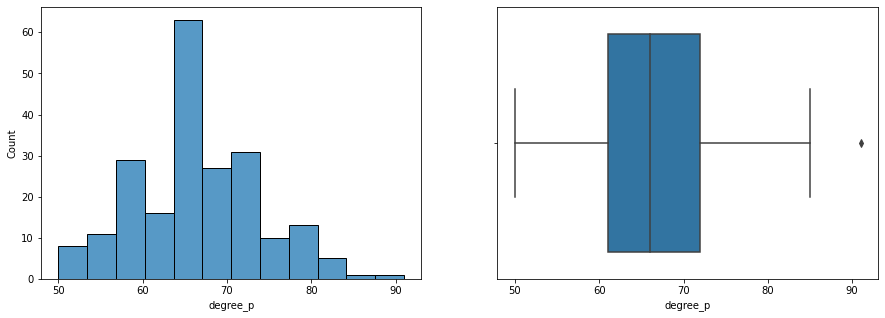

In [24]:
# Univariate analysis for degree_p   #it is imbalance 

fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='degree_p', data=df, ax=axs[0])
sns.boxplot(x='degree_p', data=df,ax=axs[1])

<AxesSubplot:xlabel='etest_p'>

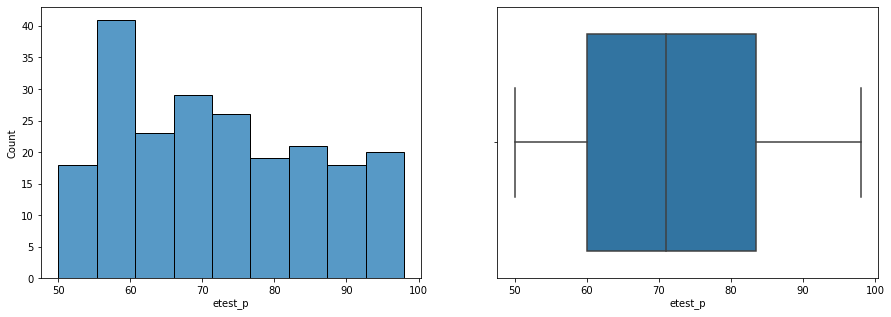

In [25]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='etest_p', data=df, ax=axs[0])
sns.boxplot(x='etest_p', data=df,ax=axs[1])

<AxesSubplot:xlabel='degree_t', ylabel='count'>

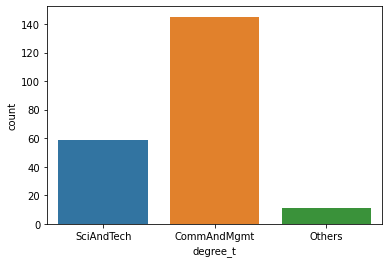

In [26]:
sns.countplot(x='degree_t', data=df)

#### Observation:

Maximum candidates are with 'Communication and Management' degree

<AxesSubplot:xlabel='workex', ylabel='count'>

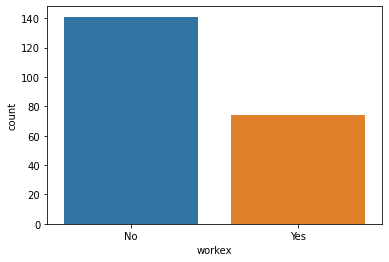

In [27]:
# Countplot for workex
sns.countplot(x="workex",data=df)

In [28]:
df.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

#### Observation:

Maximum candidates are without any work experience

#### Bivariate Analysis

In [29]:
df_num = df.select_dtypes(exclude='object')
num_list = df_num.columns
num_list

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [30]:
df_cat = df.select_dtypes(include='object')
cat_list = df_cat.columns
cat_list

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

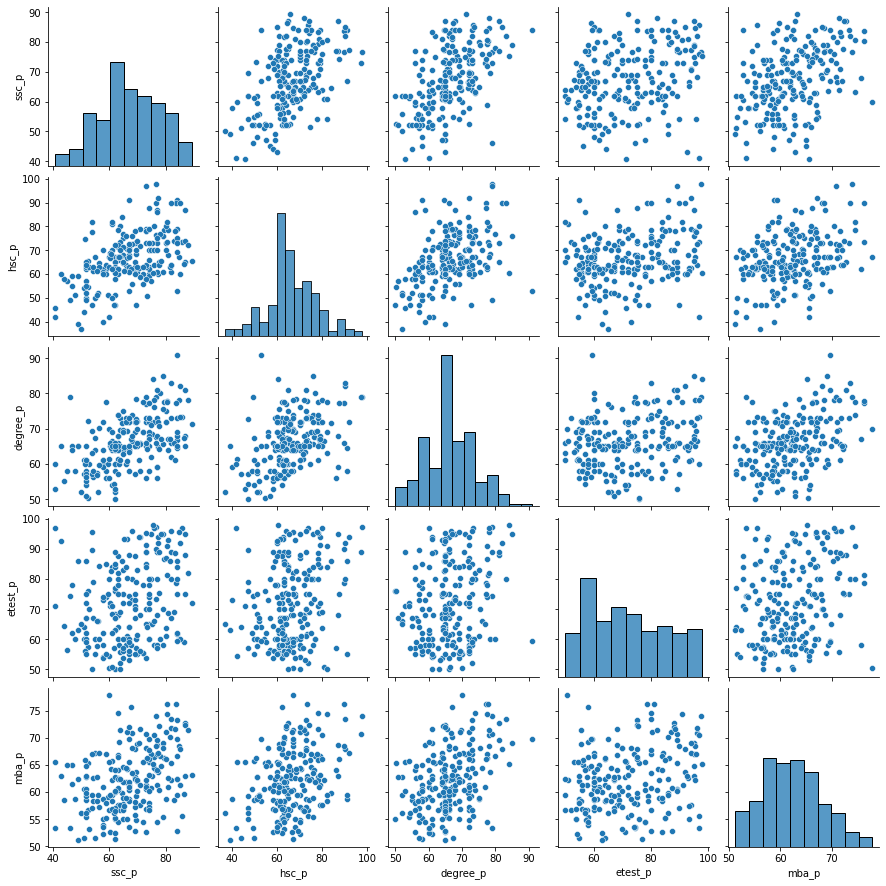

In [31]:
# Pairplot for numeric features
sns.pairplot(vars=num_list,data=df)

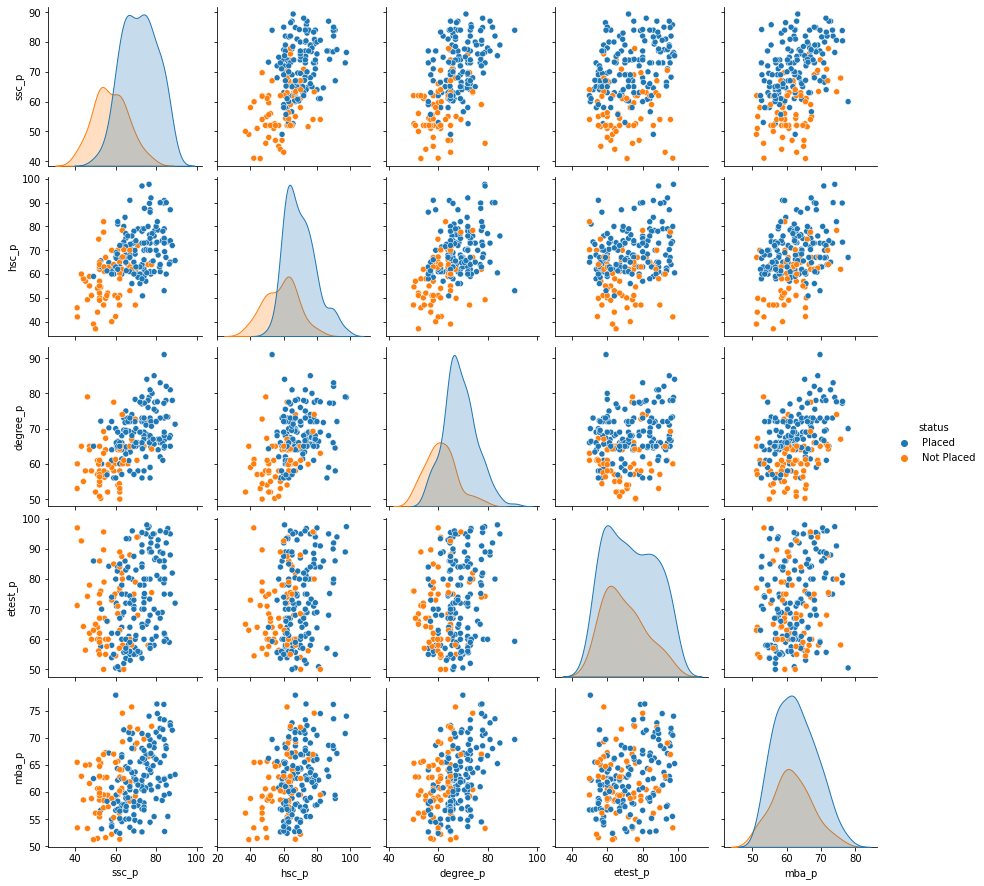

In [32]:
sns.pairplot(vars=num_list,data=df,hue="status")

In [33]:
# Save coefficient of correlation in corr object
corr=df[num_list].corr()

<AxesSubplot:>

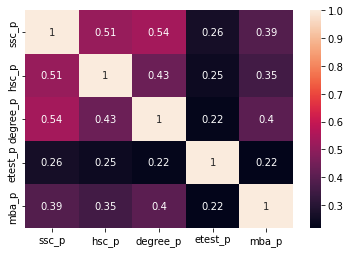

In [34]:
# Plot a heatmap to analyze correlation
sns.heatmap(corr, annot=True)

#### Observation:

Numeric fields are not much correlated with each other. There is no multicollinearity in data.

<AxesSubplot:xlabel='workex', ylabel='etest_p'>

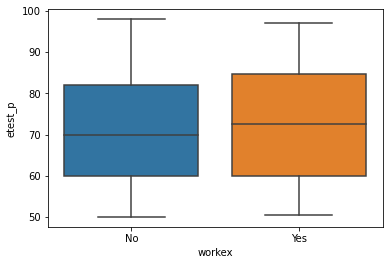

In [35]:
# Bivariate analysis of workex and etest_p
sns.boxplot(x="workex",y="etest_p",data=df) #there is no significance diffrence

Median etest score of experienced candidates is slightly more than that of inexperienced candidates

<AxesSubplot:xlabel='specialisation', ylabel='count'>

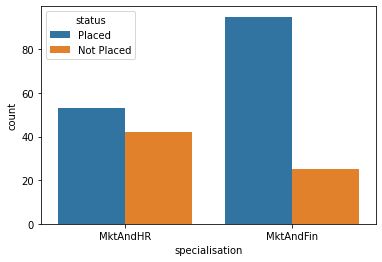

In [36]:
# Bivariate analysis of specialisation and status
sns.countplot(x="specialisation",hue="status",data=df)

It is observed that more number of candidates with 'MktAndFin' specialisation have been placed 

#### Multivariate Analysis

<AxesSubplot:xlabel='ssc_p', ylabel='degree_p'>

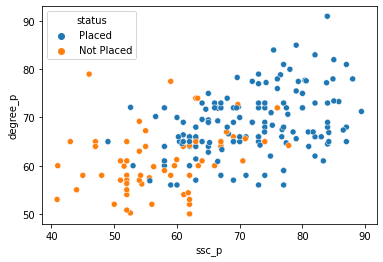

In [37]:
sns.scatterplot(x='ssc_p', y='degree_p', hue='status', data=df)

It is observed that candidates with higher ssc and degree scores have been placed

<AxesSubplot:xlabel='hsc_s', ylabel='etest_p'>

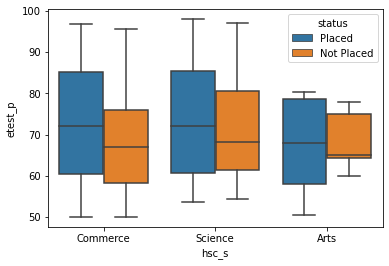

In [38]:
# Multivariate analysis of hsc_s, etest_p and status
sns.boxplot(x="hsc_s",y="etest_p",hue="status",data=df)

Median etest score of candidates who have been Placed is higher compared to who have not been placed.

Median etest score of 'Commerce' and 'Science' candidates is comparatively higher than that of Arts candidates

### Data Preparation

#### Import libraries required for data preparation

In [39]:
from sklearn.preprocessing import LabelEncoder

##### Label Encoding

In [40]:
le = LabelEncoder()

In [41]:
# Perform label encoding using le object
df[cat_list]=df[cat_list].apply(le.fit_transform)

In [42]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


##### Outlier Treatment

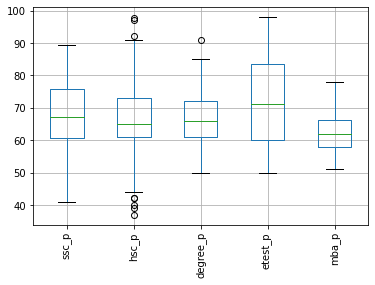

In [43]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [44]:
# Define a function treat_outlier to imput whisker values to the outlier
def treat_outliers(x):
    #taking 25,75 percentile of col
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    #calculating IQR range
    IQR=q3-q1
    #calculating minimum threshol
    lower_bound=q1-(1.5*IQR)
    upper_bound=q3+(1.5*IQR)
    #capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [45]:
for i in num_list:
    df[i]=treat_outliers(df[i])

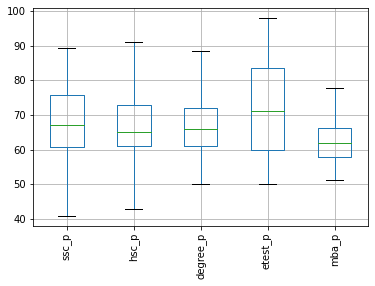

In [46]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int32  
dtypes: float64(5), int32(8)
memory usage: 15.2 KB


In [48]:
df.status.value_counts()

1    148
0     67
Name: status, dtype: int64

#### Import all libraries required for building and evaluation the model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix,roc_auc_score,roc_curve

#### Logistic Regression Model 

In [50]:
# Capture independent variables in x and dependent in y
x=df.drop("status",axis=1)
y=df.status

In [51]:
# Perform train test split with 30% test set
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=52)

In [52]:
# Create an object of Logistic Regression and train the model using fit fucntion
logreg = LogisticRegression(max_iter=700)
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=700)

In [53]:
# Check accuracy of train data
logreg.score(X_train,Y_train)

0.88

In [54]:
# Check accuracy of test data
logreg.score(X_test,Y_test)  #it is a good fit model

0.8615384615384616

In [55]:
# Predict y for train ans test data
Y_train_predict = logreg.predict(X_train)
Y_test_predict =  logreg.predict(X_test)

In [66]:
Y_test_predict

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [67]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
100,0,45.0,1,57.00,1,1,58.0,0,1,56.39,1,64.95
41,0,74.0,1,63.16,1,1,65.0,0,1,65.00,1,69.76
152,0,75.4,1,60.50,0,2,84.0,2,0,98.00,0,65.25
6,0,46.0,1,49.20,1,1,79.0,0,0,74.28,0,53.29
194,1,52.0,1,55.00,1,1,56.3,0,0,59.00,0,64.74


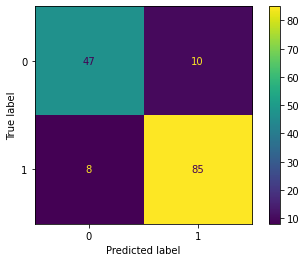

In [68]:
# Plot confusion matrix for train
plot_confusion_matrix(logreg,X_train,Y_train)

In [72]:
# Print classification report for train data
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        57
           1       0.89      0.91      0.90        93

    accuracy                           0.88       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.88      0.88      0.88       150



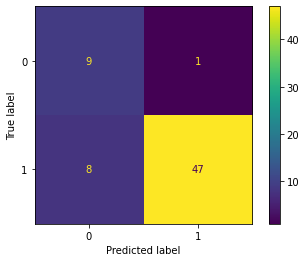

In [73]:
# Plot confusion matrix for test
plot_confusion_matrix(logreg,X_test,Y_test)


In [74]:
# Print classification report for test data
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.98      0.85      0.91        55

    accuracy                           0.86        65
   macro avg       0.75      0.88      0.79        65
weighted avg       0.91      0.86      0.87        65



In [75]:
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'])
df_pred['Class_Pred'] = Y_test_predict
df_pred['Prob_Pred_1'] = logreg.predict_proba(X_test)[:,1]
df_pred.head()

,Actual,Class_Pred,Prob_Pred_1
0,1,1,0.944169
1,0,0,0.151336
2,1,1,0.685529
3,1,1,0.997895
4,1,1,0.971418


In [78]:
logreg.predict_proba(X_test)[:,1]

array([9.44168934e-01, 1.51335746e-01, 6.85529277e-01, 9.97894543e-01,
       9.71417852e-01, 9.88435262e-01, 9.05788549e-01, 3.60405543e-01,
       9.95465731e-01, 1.60686653e-01, 9.61726477e-01, 6.42907565e-01,
       9.01848516e-01, 9.98932476e-01, 9.98454869e-01, 8.96899105e-01,
       8.65011176e-01, 8.31761308e-01, 9.99621063e-01, 9.79965042e-01,
       9.93163073e-01, 4.32562947e-01, 9.99542015e-01, 9.33611542e-01,
       8.82239090e-01, 8.28050769e-01, 3.91188633e-03, 9.99007163e-01,
       8.97908460e-01, 6.97431883e-01, 9.96330514e-01, 9.06909108e-02,
       9.97768491e-01, 9.98747074e-01, 7.72165093e-01, 4.75118314e-01,
       8.99711738e-01, 4.96620241e-01, 7.03974634e-01, 7.58503496e-01,
       8.46008897e-01, 4.34243934e-02, 9.98405874e-01, 7.23620463e-05,
       7.64593164e-01, 9.85829600e-01, 4.98398668e-02, 9.97000675e-01,
       9.93368505e-01, 3.94668970e-01, 9.77507466e-01, 1.98916938e-02,
       9.97457224e-01, 3.94733825e-01, 8.62376185e-03, 1.06659074e-01,
      

In [80]:
df_pred.head()

,Actual,Class_Pred,Prob_Pred_1
0,1,1,0.944169
1,0,0,0.151336
2,1,1,0.685529
3,1,1,0.997895
4,1,1,0.971418


In [79]:
df_pred.tail()

,Actual,Class_Pred,Prob_Pred_1
60,1,1,0.974636
61,1,1,0.990581
62,1,0,0.414130
63,1,1,0.886287
64,1,1,0.998832


<AxesSubplot:xlabel='Class_Pred', ylabel='Prob_Pred_1'>

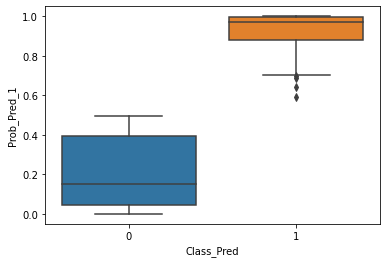

In [76]:
sns.boxplot(x='Class_Pred', y='Prob_Pred_1', data=df_pred)

<AxesSubplot:xlabel='Actual', ylabel='Prob_Pred_1'>

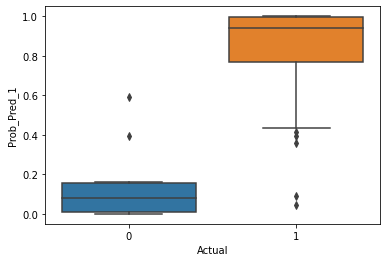

In [62]:
sns.boxplot(x='Actual', y='Prob_Pred_1', data=df_pred)

AUC: 0.960


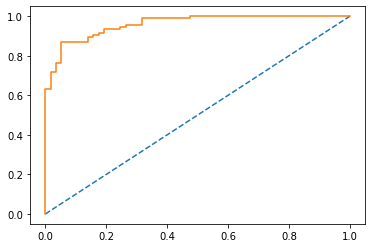

In [84]:
# predict probabilities
probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds=roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle="--")
#plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

AUC: 0.967


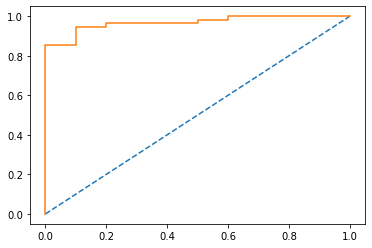

In [85]:
# Plot ROC Curve for test data
probs = logreg.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
test_fpr,test_tpr,test_thresholds=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(test_fpr,test_tpr)

##### Conclusion:

Overall accuracy of the built logistic regression model is at 86% on the test dataset. 

Recall for both class 0 and class 1 is 0.90 and 0.85 respectively.

Accuracy in train dataset is at 88% and test dataset is at 86%. As there is not much difference, there is no overfitting in the model.

AUC for test data is at 0.97.

Considering the evaluation, we can consider the above model as the final one.